# 2 Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

## Cleaning data

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [4]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Exploratory data analysis

In [9]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [10]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of price

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

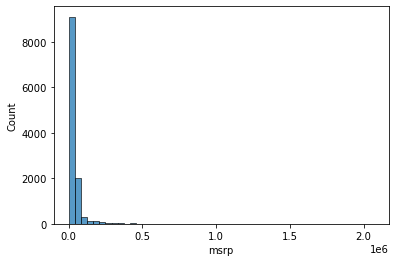

In [13]:
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

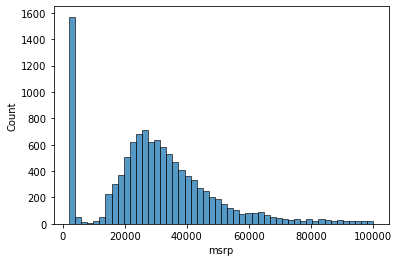

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [15]:
np.log1p([0, 1, 10, 10000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  9.21044037, 11.51293546])

In [16]:
price_logs = np.log1p(df.msrp)

In [17]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

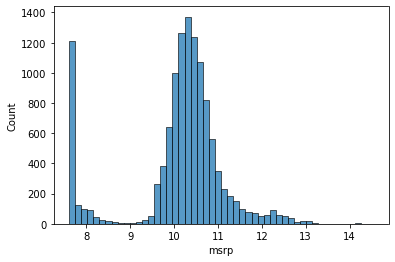

In [18]:
sns.histplot(price_logs, bins=50)

### Missing values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Validation Framework

In [20]:
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val
n_val, n_test, n_train

(2382, 2382, 7150)

In [110]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [22]:
np.random.seed(2)
np.random.shuffle(idx)

In [23]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [24]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_test+n_train]]
df_val = df.iloc[idx[n_test+n_train:]]
len(df_test), len(df_val), len(df_train)

(2382, 2382, 7150)

### Restore Index

In [25]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head(10)

make            model  year             engine_fuel_type  engine_hp  \
0   chevrolet           cobalt  2008             regular_unleaded      148.0   
1      toyota           matrix  2012             regular_unleaded      132.0   
2      subaru          impreza  2016             regular_unleaded      148.0   
3  volkswagen          vanagon  1991             regular_unleaded       90.0   
4        ford            f-150  2017     flex-fuel_(unleaded/e85)      385.0   
5  volkswagen           rabbit  2008             regular_unleaded      170.0   
6     bentley  continental_gtc  2013  premium_unleaded_(required)      500.0   
7         bmw         6_series  2015  premium_unleaded_(required)      315.0   
8     maybach               57  2012  premium_unleaded_(required)      543.0   
9        ford   f-150_heritage  2004             regular_unleaded      202.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0            manual  front_wheel_drive              2.0   
1               4.0         automatic  front_wheel_drive              4.0   
2               4.0         automatic    all_wheel_drive              4.0   
3               4.0            manual   rear_wheel_drive              3.0   
4               8.0         automatic   four_wheel_drive              4.0   
5               5.0            manual  front_wheel_drive              4.0   
6               8.0         automatic    all_wheel_drive              2.0   
7               6.0         automatic   rear_wheel_drive              2.0   
8              12.0         automatic   rear_wheel_drive              4.0   
9               6.0            manual   four_wheel_drive              2.0   

                  market_category vehicle_size       vehicle_style  \
0                             NaN      compact               coupe   
1                       hatchback      compact       4dr_hatchback   
2                       hatchback      compact       4dr_hatchback   
3                             NaN        large   passenger_minivan   
4                       flex_fuel        large     crew_cab_pickup   
5                       hatchback      compact       4dr_hatchback   
6  exotic,luxury,high-performance      midsize         convertible   
7              luxury,performance      midsize               coupe   
8                   exotic,luxury        large               sedan   
9                             NaN        large  regular_cab_pickup   

   highway_mpg  city_mpg  popularity    msrp  
0           33        24        1385   14410  
1           32        25        2031   19685  
2           37        28         640   19795  
3           18        16         873    2000  
4           21        15        5657   56260  
5           29        22         873   17575  
6           24        14         520  191400  
7           32        21        3916   76100  
8           16        10          67  379050  
9           18        13        5657   26030

### Log transformation

In [26]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train[5]

9.774289614064447

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.5 Linear Regression

In [28]:
df_train.iloc[5]

make                        volkswagen
model                           rabbit
year                              2008
engine_fuel_type      regular_unleaded
engine_hp                        170.0
engine_cylinders                   5.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category              hatchback
vehicle_size                   compact
vehicle_style            4dr_hatchback
highway_mpg                         29
city_mpg                            22
popularity                         873
Name: 5, dtype: object

In [29]:
xi = [280, 16, 5657]

In [30]:
w0 = 7.756
w = [0.04, 0.07, 0.02]

In [31]:
def linear_regression(xi):
    n = len(xi)
    
    predict = w0
    for j in range(n):
        print(predict , w[j] , xi[j])
        predict = predict + w[j] * xi[j]
        print(predict)
    
    return predict

In [32]:
linear_regression(xi)

7.756 0.04 280
18.956000000000003
18.956000000000003 0.07 16
20.076000000000004
20.076000000000004 0.02 5657
133.216


133.216

In [33]:
np.expm1(133.216)

7.161000453395875e+57

In [34]:
np.log1p(7.161000453395875e+57)

133.216

# 2.6 Linear Regression vector form

In [35]:
def dot(xi, w):
    n = len(xi)
    
    result = 0.0
    for j in range(n):
        result += w[j] * xi[j]
    
    return result

In [36]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [37]:
w_new = [w0] + w
w_new

[7.756, 0.04, 0.07, 0.02]

In [38]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [39]:
linear_regression(xi)

133.216

In [40]:
w0 = 7.756
w = [0.04, 0.07, 0.02]
w_new = [w0] + w

In [41]:
x1 = [1, 232, 53, 3]
x2 = [1, 432, 22, 6]
x2 = [1, 132, 62, 2]
X = [x1, x2, x2]
X = np.array(X)

In [42]:
def linear_regression(X):
    return X.dot(w_new)

In [43]:
linear_regression(X)

array([20.806, 17.416, 17.416])

# 2.7 Training linear regression model

In [44]:
def train_linear_regression(X, Y):
    pass

In [45]:
X = [
    [242, 63, 44],
    [132, 93, 13],
    [232, 53, 3],
    [532, 73, 8],
    [232, 53, 65],
    [292, 53, 11],
    [832, 83, 3],
    [232, 99, 3]
]
X = np.array(X)

In [46]:
y = [35, 234, 22, 534, 344, 32, 234, 56]

In [47]:
X.shape[0]

8

In [48]:
np.column_stack([np.ones(X.shape[0]), X])

array([[  1., 242.,  63.,  44.],
       [  1., 132.,  93.,  13.],
       [  1., 232.,  53.,   3.],
       [  1., 532.,  73.,   8.],
       [  1., 232.,  53.,  65.],
       [  1., 292.,  53.,  11.],
       [  1., 832.,  83.,   3.],
       [  1., 232.,  99.,   3.]])

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [50]:
train_linear_regression(X, y)

(-186.55804798824244, array([0.4055601 , 2.38740445, 3.44724686]))

# 2.8 Car price baseline model

In [51]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [52]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
        'popularity']
df_train[base]

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         148.0               4.0           33        24        1385
1         132.0               4.0           32        25        2031
2         148.0               4.0           37        28         640
3          90.0               4.0           18        16         873
4         385.0               8.0           21        15        5657
...         ...               ...          ...       ...         ...
7145      300.0               6.0           31        20        3916
7146      210.0               4.0           30        24         873
7147      285.0               6.0           22        17         549
7148      563.0              12.0           21        13          86
7149      200.0               4.0           31        22         873

[7150 rows x 5 columns]

In [53]:
X_train = df_train[base].fillna(0).values

In [54]:
w0, w = train_linear_regression(X_train, y_train)

In [55]:
w0, w

(7.927257388069984,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [56]:
y_pred = w0 + X_train.dot(w)

In [57]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

In [58]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

<AxesSubplot:ylabel='Count'>

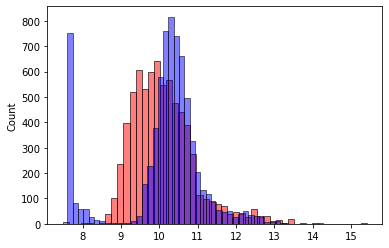

In [59]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# 2.9 Root Mean Squared Error

In [60]:
def rmse(y, y_pred):
    error = y - y_pred
    sqr_error = error ** 2
    mean_sqr_error = sqr_error.mean()
    return np.sqrt(mean_sqr_error)

In [61]:
rmse(y_train, y_pred)

0.7554192603920132

# 2.10 Validating the model

In [62]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
        'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [63]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7359130757318717

# 2.11 Simple feature engineering

In [65]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2021 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5149229218585313

<AxesSubplot:ylabel='Count'>

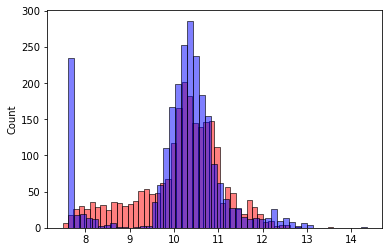

In [67]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# 2.13 Categorical variables

In [68]:
df_train.number_of_doors.nunique()

3

In [69]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2021 - df.year
    features.append('age')
    
    for v in range(2, 5):
        df['number_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('number_of_doors_%s' %v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

df[base].values

array([[ 335.,    6.,   26.,   19., 3916.],
       [ 300.,    6.,   28.,   19., 3916.],
       [ 300.,    6.,   28.,   20., 3916.],
       ...,
       [ 300.,    6.,   23.,   16.,  204.],
       [ 300.,    6.,   23.,   16.,  204.],
       [ 221.,    6.,   26.,   17.,   61.]])

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5133819172833368

In [72]:
makes = list(df.make.value_counts().head().index)

In [73]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2021 - df.year
    features.append('age')
    
    for v in range(2, 5):
        df['number_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('number_of_doors_%s' %v)
    
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5050722255723264

In [75]:
w0

11.059422893293029

In [76]:
df_train.dtypes == object

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
dtype: bool

In [77]:
categoricale_variable = ['make', 'engine_fuel_type', 'transmission_type',
                         'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [78]:
categoricale_variable

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [79]:
categories = {}
for c in categoricale_variable:
    categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [80]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2021 - df.year
    features.append('age')
    
    for v in range(2, 5):
        df['number_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('number_of_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

244.82716796399328

In [82]:
w0

8.244123363277987e+16

# 2.13 Regularization

In [83]:
X = [
    [4, 4, 4],
    [5, 1, 1],
    [6, 7, 7],
    [6, 3, 3],
    [1, 5, 5],
    [3, 2, 2.00000001]
]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [5.        , 1.        , 1.        ],
       [6.        , 7.        , 7.        ],
       [6.        , 3.        , 3.        ],
       [1.        , 5.        , 5.        ],
       [3.        , 2.        , 2.00000001]])

In [84]:
XTX = X.T.dot(X)
XTX

array([[123.        ,  92.        ,  92.00000003],
       [ 92.        , 104.        , 104.00000002],
       [ 92.00000003, 104.00000002, 104.00000004]])

In [85]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.40357298e-02,  2.08114372e+04, -2.08114573e+04],
       [ 2.08114573e+04,  7.03687442e+13, -7.03687442e+13],
       [-2.08114785e+04, -7.03687442e+13,  7.03687442e+13]])

In [86]:
y = [1,2,3,1,2,3]

In [87]:
XTX_inv.dot(X.T).dot(y)

array([ 2.53854060e-01, -1.31567412e+06,  1.31567462e+06])

In [88]:
XTX = [
    [1, 2, 2],
    [2, 2, 2.0000001],
    [2, 1.0000001, 1.001]
]

In [89]:
np.linalg.inv(XTX)

array([[-1.00010002e+00,  1.00015004e+00, -1.00025006e-04],
       [-9.99249912e+02,  1.49987497e+03, -1.00025001e+03],
       [ 1.00024996e+03, -1.50037504e+03,  1.00025006e+03]])

In [90]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [91]:
XTX = XTX + 0.01 * np.eye(3)

In [92]:
np.linalg.inv(XTX)

array([[ -0.62266229,   0.42661395,   0.38783051],
       [-38.35682482,  57.76579895, -38.39560242],
       [ 39.17126928, -57.981239  ,  38.19974801]])

In [93]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [94]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train, y_train, 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4522334298463452

# 2.14 Tuning the model

In [95]:
for r in [0.01, 0.0001, 0.01, 0.1, 1, 0.0, 10]:
    X_train = prepare_X(df_train)

    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    print(r, rmse(y_val, y_pred), w0)
    

0.01 0.4522334298463452 6.492086642822689
0.0001 0.4522280052803704 6.518213178923413
0.01 0.4522334298463452 6.492086642822689
0.1 0.45228745567764306 6.403929186831829
1 0.45312194692393915 5.828176932177366
0.0 244.82716796399328 8.244123363277987e+16
10 0.46761023819111863 4.413657117190183


In [96]:
r = 0.01
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train, y_train, r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


0.4522334298463452

# 2.15 Using the model

In [97]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [98]:
X_full_train = prepare_X(df_full_train)

In [99]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   0.],
       [174.,   4.,  42., ...,   0.,   0.,   0.],
       [256.,   6.,  27., ...,   0.,   0.,   0.]])

In [100]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.27852782,
       10.00789261, 10.40414162])

In [101]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)
w0, w

(6.5283861045741975,
 array([ 1.70412338e-03,  1.10935334e-01, -6.85924904e-03, -6.09484384e-03,
        -5.55098328e-05, -9.64853193e-02, -7.15661096e-01, -8.58609369e-01,
        -5.69063325e-01, -3.46129828e-02,  1.91861420e-01,  1.11320983e-02,
        -9.24562151e-02, -1.01843373e-01, -4.65272948e-01,  8.26498002e-02,
        -3.22677699e-01, -5.40342395e-01, -7.83335996e-02,  1.10294914e+00,
         9.17625376e-01,  1.16822341e+00,  2.80282512e+00,  5.36755012e-01,
         1.67833673e+00,  1.59108291e+00,  1.66551059e+00,  1.59345513e+00,
        -7.09780844e-02,  5.30651179e-02, -3.42575634e-02, -2.52890051e-02,
         9.03749361e-04,  2.26340588e+00,  2.14034946e+00,  2.12462952e+00,
        -3.63390902e-02,  4.28978310e-02,  1.67096117e-01,  3.22706485e-01,
        -1.46427369e-01]))

In [102]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.456075788612486

<AxesSubplot:ylabel='Count'>

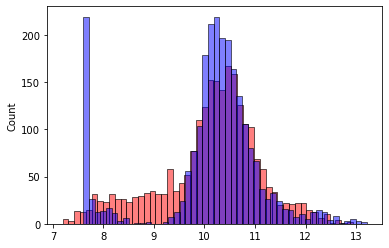

In [103]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)

### Predict single car price

In [104]:
car = df_test.iloc[21].to_dict()
car

{'make': 'gmc',
 'model': 'sierra_1500',
 'year': 2016,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 285.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 17,
 'popularity': 549}

In [105]:
df_small = pd.DataFrame([car])
df_small

make        model  year          engine_fuel_type  engine_hp  \
0  gmc  sierra_1500  2016  flex-fuel_(unleaded/e85)      285.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0         automatic  four_wheel_drive              2.0   

  market_category vehicle_size       vehicle_style  highway_mpg  city_mpg  \
0       flex_fuel        large  regular_cab_pickup           22        17   

   popularity  
0         549

In [106]:
X_small = prepare_X(df_small)
X_small

array([[285.,   6.,  22.,  17., 549.,   5.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.]])

In [107]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.53035136095729

In [108]:
np.expm1(y_pred)

37433.625138736796

In [109]:
np.expm1(y_test[20])

34494.99999999997